In [1]:
# !pip install matplotlib
# !pip install pandas
# !pip install numpy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Generate time/#threads plots

In [7]:
def get_serial_data(size_of_matrix, jobid, print_df =False):
    directory_path = './outputs/timings'
    files = os.listdir(directory_path)
    csv_file = [file for file in files if "serial" in file and str(jobid) in file]
    if csv_file:
        csv_file_path = os.path.join(directory_path, csv_file[0])
        df = pd.read_csv(csv_file_path)
        if print_df:
            print("\nSerial times:")
            print(df)
    else:
        print("No CSV file with the name 'serial-data' found.")

    serial_time = df[df["dim"] == size_of_matrix]["time"]
    return serial_time

In [9]:
data1 = pd.read_csv("./outputs/timings/openmp-scal-927819.csv")
data2 = pd.read_csv("./outputs/timings/openmp-scal-927934.csv")
data3 = pd.read_csv("./outputs/timings/openmp-scal-903279.csv")

data = pd.concat([data1, data2, data3], ignore_index=True)
data.head()

,dim,nthreads,time
0,1000,1,14.296129
1,1000,2,13.578694
2,1000,3,13.277179
3,1000,4,13.110846
4,1000,5,13.023957


In [10]:
df100 = data[data["dim"] == 100]
df500 = data[data["dim"] == 500]
df1000 = data[data["dim"] == 1000]
df1500 = data[data["dim"] == 1500]
df2000 = data[data["dim"] == 2000]

In [17]:
df2000

,dim,nthreads,time
12,2000,1,57.17398
13,2000,2,54.532898
14,2000,3,52.991986
15,2000,4,52.257414
16,2000,5,51.892812
17,2000,6,51.58971
18,2000,7,51.355075
19,2000,8,51.190207
20,2000,9,51.101348
21,2000,10,50.951139


## Serial times

In [11]:
SERIAL_JOBID = 743101

serial100 = get_serial_data(size_of_matrix=100, jobid=SERIAL_JOBID, print_df=True)
serial500 = get_serial_data(size_of_matrix=500, jobid=SERIAL_JOBID)
serial1000 = get_serial_data(size_of_matrix=1000, jobid=SERIAL_JOBID)
serial1500 = get_serial_data(size_of_matrix=1500, jobid=SERIAL_JOBID)
serial2000 = get_serial_data(size_of_matrix=2000, jobid=SERIAL_JOBID)
print(serial100)
print(serial500)
print(serial1000)
print(serial1500)
print(serial2000)

No CSV file with the name 'serial-data' found.


UnboundLocalError: cannot access local variable 'df' where it is not associated with a value

In [12]:
#Add speedup column
def add_speedup_and_normalized_t_columns(data: pd.DataFrame, serial_time):
    data["speedup"] = serial_time / (data["time"])
    print(f"type of serial_time element = {type(serial_time.iloc[1])}\n, type of data['time'] elements = {type(data['time'].iloc[1])}\n\n")
    max_time = data["time"].max()
    data["max_normalized"] = data["time"].div(max_time)

add_speedup_and_normalized_t_columns(df100, serial100)
add_speedup_and_normalized_t_columns(df500, serial500)
add_speedup_and_normalized_t_columns(df1000, serial1000)
add_speedup_and_normalized_t_columns(df1500, serial1500)
add_speedup_and_normalized_t_columns(df2000, serial2000)

NameError: name 'serial100' is not defined

In [ ]:
df2000.head()

: 

In [ ]:
dataframes = [
    (df100, "Dimension 100", "green"),
    (df500, "Dimension 500", "blue"),
    (df1000, "Dimension 1000", "red"),
    (df1500, "Dimension 1500", "purple"),
    (df2000, "Dimension 2000", "violet")
]

plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["max_normalized"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Normalized\ntime", labelpad=35, rotation=0, fontsize=10)
plt.legend()
plt.show()

: 

In [ ]:
plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["speedup"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Speedup", labelpad=30, rotation=0, fontsize=10)
plt.legend()
plt.show()

: 

## Simple fast openmp scaling plot

In [9]:
data = pd.read_csv("./outputs/timings/openmp-scal-939929.csv")
print(data)

     dim  nthreads         time
0   1000         1    14.317193
1   1000         2    13.643223
2   1000         3    13.293959
3   1000         4    13.101681
4   1000         5    13.080262
5   1000         6    13.053117
6   1000         7    12.964228
7   1000         8    12.888515
8   1000         9    12.939595
9   1000        10    12.878284
10  1000        11    12.908937
11  1000        12    12.891520
12  2000         1    57.252512
13  2000         2    54.373786
14  2000         3    53.101985
15  2000         4    52.421843
16  2000         5    54.968853
17  2000         6    51.773060
18  2000         7    51.543457
19  2000         8    51.229703
20  2000         9    51.245647
21  2000        10    51.192376
22  2000        11    50.999042
23  2000        12    51.012678
24  4000         1   231.082784
25  4000         2   217.231123
26  4000         3   211.955116
27  4000         4   217.270393
28  4000         5   211.490605
29  4000         6   209.017678
30  4000

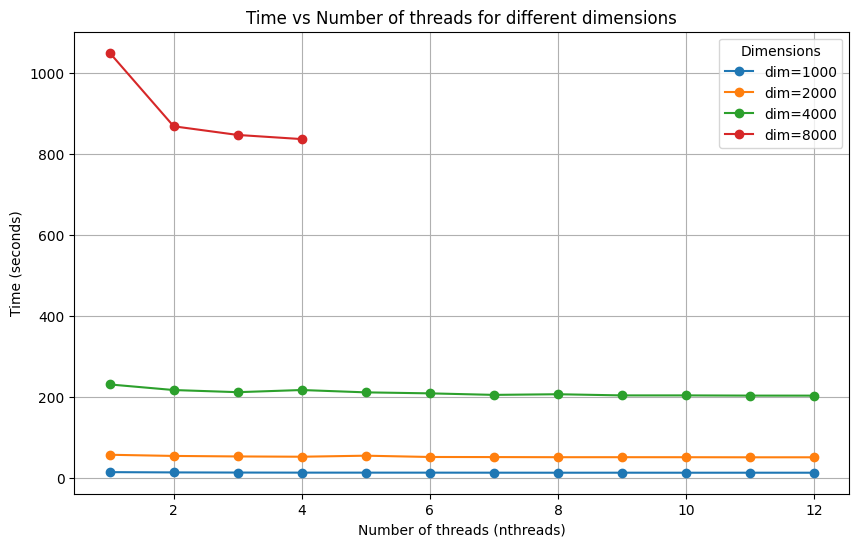

In [24]:
plt.figure(figsize=(10,6))
for dim in data["dim"].unique():
    subset = data[data["dim"] == dim]
    plt.plot(subset["nthreads"], subset["time"], marker="o", label=f"dim={dim}")

plt.title("Time vs Number of threads for different dimensions")
plt.xlabel("Number of threads (nthreads)")
plt.ylabel("Time (seconds)")
plt.legend(title="Dimensions")
plt.grid(True)
plt.show()